# Data Visualization with Swing

A picture is worth a thousand words. In machine learning, we usually handle high-dimensional data, which is impossible to draw on display directly. But a variety of statistical plots are tremendously valuable for us to grasp the characteristics of many data points. Smile provides data visualization tools such as plots and maps for researchers to understand information more easily and quickly.

Smile provides many advanced interactive statistical plots with Java's Swing graphics library. To render Swing plot canvas in Notebook, we generate an image and embedded it into HTML. Therefore, we lose the interactive functionality. To fully leverage Swing-based plots, we recommend the users to use Smile's shell.

First, let's import Smile and also add an `implict` function to display Swing's `JComponent` in almond. 

In [ ]:
import $ivy.`com.github.haifengl::smile-scala:2.1.0`
import $ivy.`org.slf4j:slf4j-simple:1.7.26`  

import java.lang.Math._
import java.awt.Color.{BLACK, BLUE, CYAN, DARK_GRAY, GRAY, GREEN, LIGHT_GRAY, MAGENTA, ORANGE, PINK, RED, WHITE, YELLOW}
import smile.plot.swing.Palette.{DARK_RED, VIOLET_RED, DARK_GREEN, LIGHT_GREEN, PASTEL_GREEN, FOREST_GREEN, GRASS_GREEN, NAVY_BLUE, SLATE_BLUE, ROYAL_BLUE, CADET_BLUE, MIDNIGHT_BLUE, SKY_BLUE, STEEL_BLUE, DARK_BLUE, DARK_MAGENTA, DARK_CYAN, PURPLE, LIGHT_PURPLE, DARK_PURPLE, GOLD, BROWN, SALMON, TURQUOISE, BURGUNDY, PLUM}
import smile.plot.swing._
import smile.plot.show
import smile._

System.setProperty("java.awt.headless", "true")
implicit def display(canvas: javax.swing.JComponent): Unit = {
  publish.html(smile.plot.swing.img(canvas))
}

Now let's plot a heart. Math is beautiful, isn't it?

In [ ]:
val heart = -314 to 314 map { i =>
    val t = i / 100.0
    val x = 16 * pow(sin(t), 3)
    val y = 13 * cos(t) - 5 * cos(2*t) - 2 * cos(3*t) - cos(4*t)
    Array(x, y)
}

show(plot(heart.toArray))

Note that the function `plot` returns a `PlotCanvas` that encapsulates the plot specification. The function `show` does the renderring job (with the help of implict argument `display` that we defined earlier).

## Scatter Plot

A scatter plot displays data as a collection of points. The points can be color-coded, which is very useful for classification tasks. The user can use `plot` functions to draw scatter plot easily.
```
def plot(data: Array[Array[Double]], legend: Char = '*', color: Color = BLACK): PlotCanvas

def plot(data: Array[Array[Double]], labels: Array[String]): PlotCanvas

def plot(data: Array[Array[Double]], label: Array[Int], legend: Char, palette: Array[Color]): PlotCanvas

def plot(data: Array[Array[Double]], label: Array[Int], legend: Array[Char], palette: Array[Color]): PlotCanvas
```
The legends are as follows.

- . : dot
- \+ : \+
- \- : \-
- | : |
- \* : star
- x : x
- o : circle
- O : large circle
- @ : solid circle
- \# : large solid circle
- s : square
- S : large square
- q : solid square
- Q : large solid square

For any other char, the data point will be drawn as a dot.

The functions return a `PlotCanvas`, which can be used to control the plot programmatically. The user can also use the popup context menu by right mouse click to print, change the title, axis labels, and font, etc.

On the desktop, the user can zoom in/out by mouse wheel. For 2D plot, the user can shift the coordinates by moving mouse after double click. The user can also select an area by mouse for detailed view. For 3D plot, the user can rotate the view by dragging mouse.

In [ ]:
val iris = read.arff("data/weka/iris.arff")
val x = iris.select(0, 1).toArray
val y = iris("class").toIntArray
val canvas = plot(x, y, Array('*', '+', 'o'), Array(RED, BLUE, CYAN))
val names = iris.names
canvas.setAxisLabels(names(0), names(1))
show(canvas)

In this example, we plot the first two columns of Iris data. We use the class label for legend and color coding. It is also easy to draw a 3D plot.

In [ ]:
val x = iris.select(0, 1, 2).toArray // take first three columns
val canvas = plot(x, y, Array('*', '+', 'o'), Array(RED, BLUE, CYAN))
canvas.setAxisLabels(names(0), names(1), names(2))
show(canvas)

However, the Iris data has four attributes. So even 3D plot is not sufficient to see the whole picture. A general practice is plot all the attribute pairs. For example,


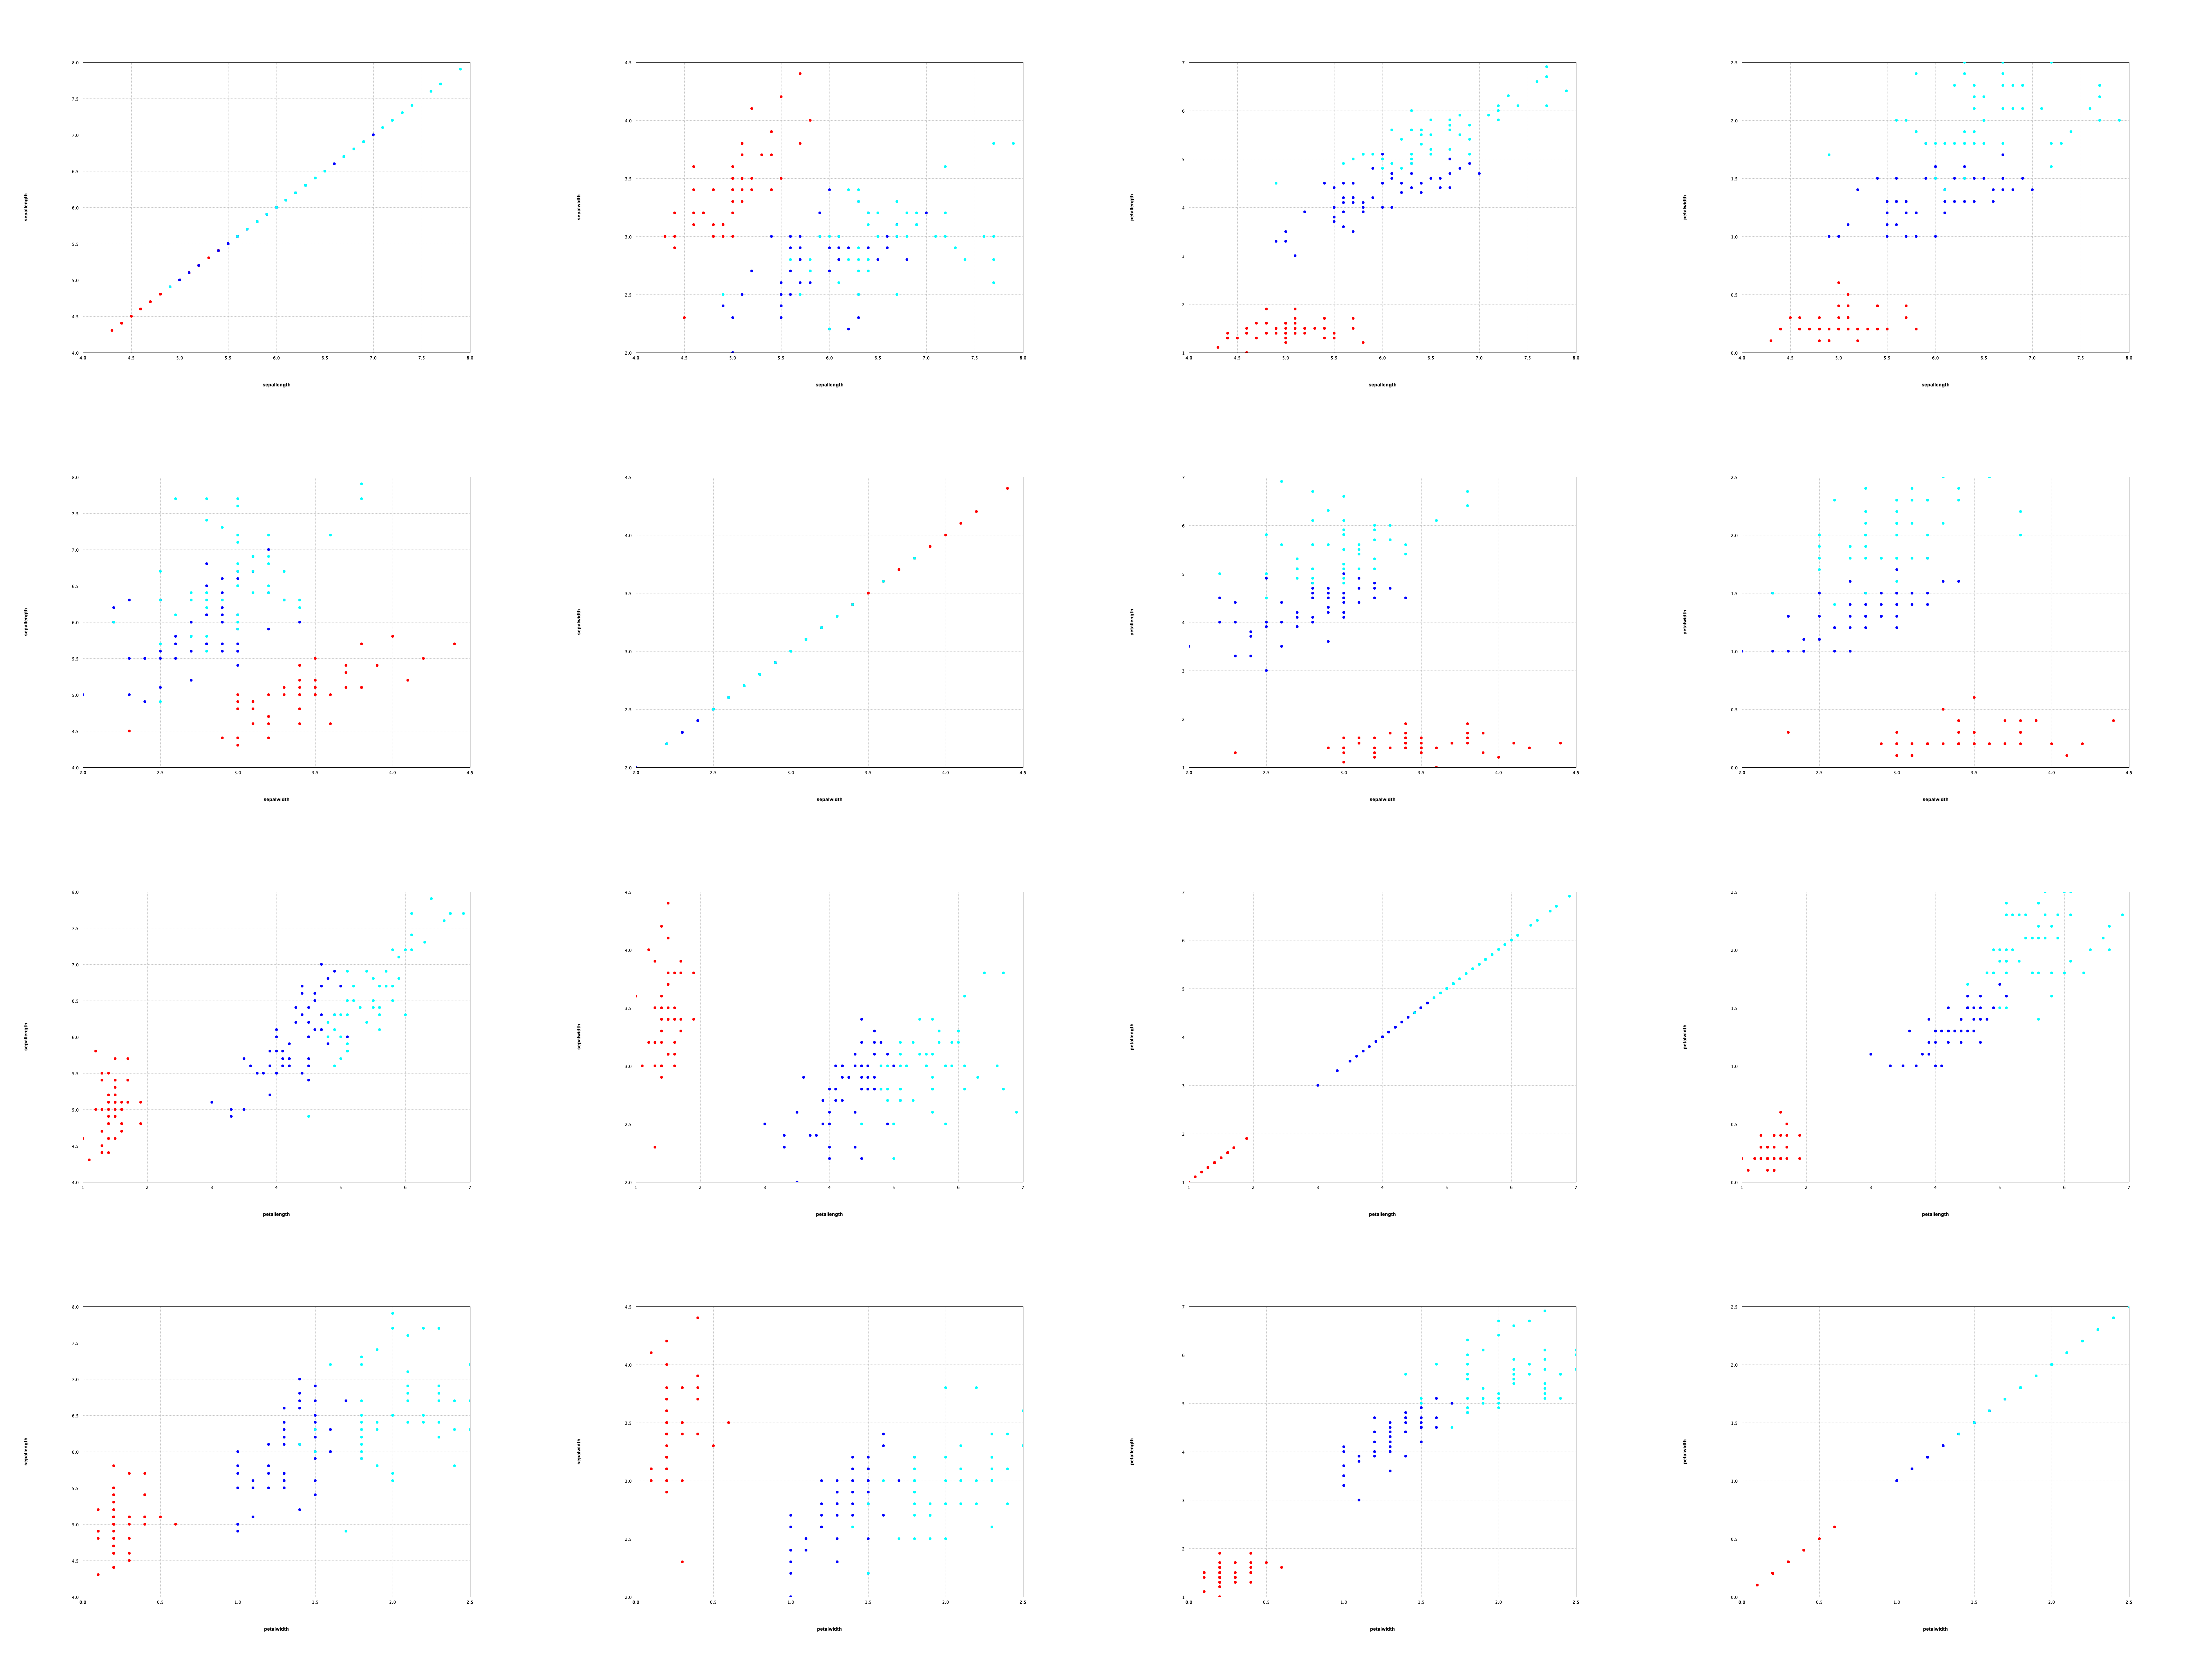

In [8]:
show(plot(iris, "class", '#', Array(RED, BLUE, CYAN)))

## Box Plot

The box plot is a standardized way of displaying the distribution of data based on the five number summary: minimum, first quartile, median, third quartile, and maximum.

Box plots can be useful to display differences between populations without making any assumptions of the underlying statistical distribution: they are non-parametric. The spacings between the different parts of the box help indicate the degree of dispersion (spread) and skewness in the data, and identify outliers.

In [ ]:
val groups = (x.map(_(0)) zip y.map("class %d" format _)).groupBy(_._2)
val labels = groups.keys.toArray
val data = groups.values.map { a => a.map(_._1) }.toArray
val window = boxplot(data, labels)
window.canvas.setAxisLabels("", iris.attributes()(0).getName)